In [1]:
# Cactus classification ... this developed using the cactus dataset 
# used for a binary classifier. The dataset is taken from: Kaggle: cactus images:
# https://www.kaggle.com/c/aerial-cactus-identification/data
# Download the zip file from the link and create a directory "dataFromKaggle" in the directory
# Where this .jpynb file is run from and unzip the dataset of cactus images.
# https://towardsdatascience.com/machine-learning-image-classification-kaggle-competition-aerial-cactus-identification-3f720aa9e51c

import tensorflow as tf
import pandas as pd
import numpy as np

import os
import math
from os import listdir

# Matplotlib is a graphing library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split

from tensorflow.keras import layers

In [2]:
# https://www.kaggle.com/vladminzatu/cactus-detection-with-tensorflow-2-0
train_lables_df = pd.read_csv('dataFromKaggle/aerial-cactus-identification/train.csv',\
                              index_col='id')
print('Total entries: ' + str(train_lables_df.size))
print(train_lables_df.head(10))

Total entries: 17500
                                      has_cactus
id                                              
0004be2cfeaba1c0361d39e2b000257b.jpg           1
000c8a36845c0208e833c79c1bffedd1.jpg           1
000d1e9a533f62e55c289303b072733d.jpg           1
0011485b40695e9138e92d0b3fb55128.jpg           1
0014d7a11e90b62848904c1418fc8cf2.jpg           1
0017c3c18ddd57a2ea6f9848c79d83d2.jpg           1
002134abf28af54575c18741b89dd2a4.jpg           0
0024320f43bdd490562246435af4f90b.jpg           0
002930423b9840e67e5a54afd4768a1e.jpg           1
00351838ebf6dff6e53056e00a1e307c.jpg           1


In [3]:
train_lables_df['has_cactus'].value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

In [4]:
train_dir = 'dataFromKaggle/aerial-cactus-identification/train/train/'
train_imgs = os.listdir(train_dir)
nr_train_images = len(train_imgs)
nr_train_images

17500

In [5]:
def get_train_image_path(id):
    return train_dir + id

def draw_cactus_image(id, ax):
    path = get_train_image_path(id)
    img = mpimg.imread(path)
    plt.imshow(img)
    ax.set_title('Label: ' + str(train_lables_df.loc[id]['has_cactus']))

0004be2cfeaba1c0361d39e2b000257b.jpg
000c8a36845c0208e833c79c1bffedd1.jpg
000d1e9a533f62e55c289303b072733d.jpg
0011485b40695e9138e92d0b3fb55128.jpg
0014d7a11e90b62848904c1418fc8cf2.jpg
0017c3c18ddd57a2ea6f9848c79d83d2.jpg
002134abf28af54575c18741b89dd2a4.jpg
0024320f43bdd490562246435af4f90b.jpg
002930423b9840e67e5a54afd4768a1e.jpg
00351838ebf6dff6e53056e00a1e307c.jpg
003519dd841a97ed16481fa0657df04d.jpg
003bb64852016d9c87871ddd8e25ab03.jpg


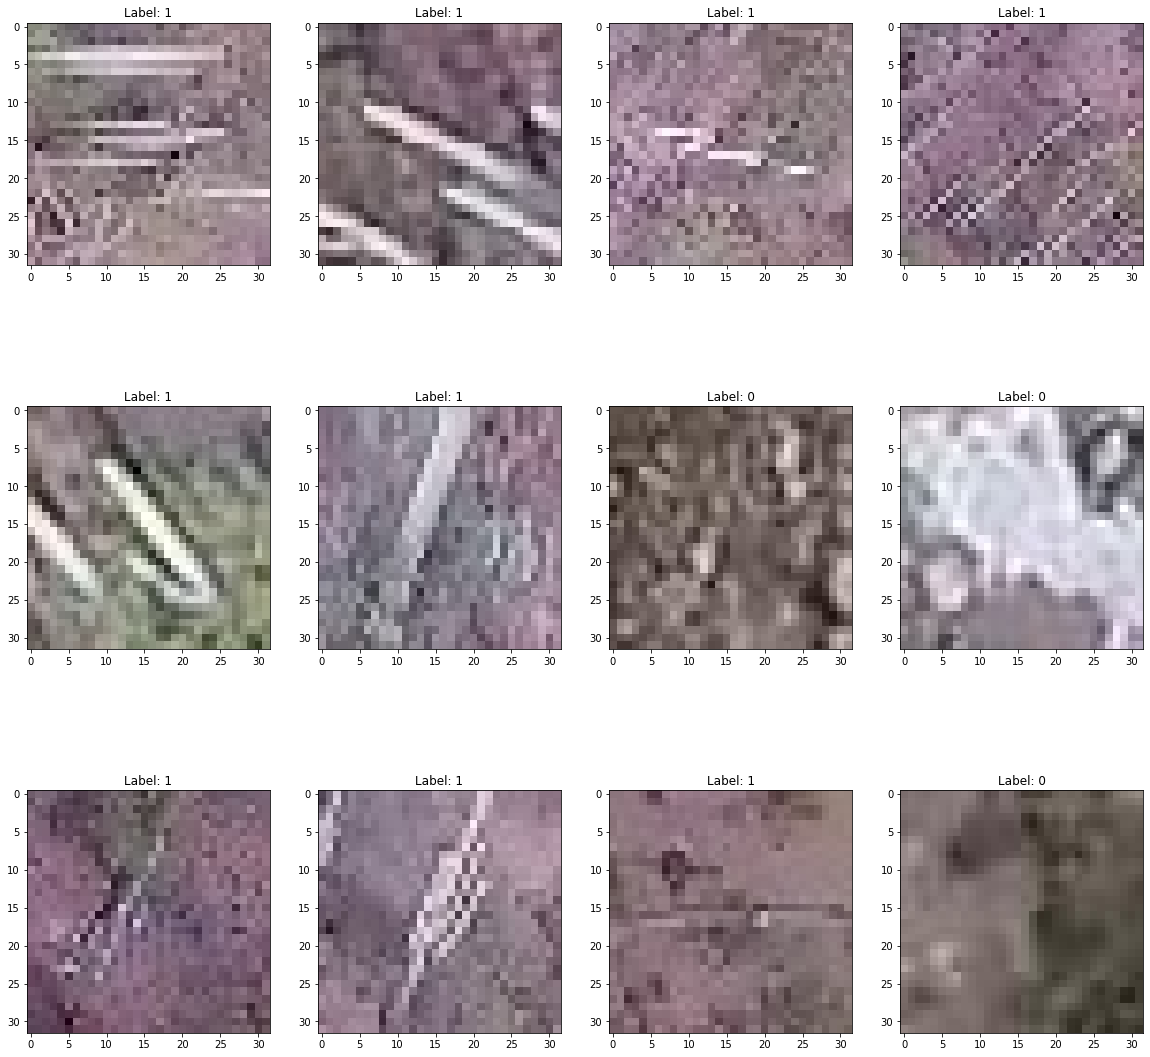

In [6]:
fig = plt.figure(figsize=(20,20))
for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1)
    print(train_imgs[i])
    draw_cactus_image(train_imgs[i], ax)

In [ ]:
train_image_paths = [train_dir + ti for ti in train_imgs]
train_image_labels = [train_lables_df.loc[ti]['has_cactus'] for ti in train_imgs]

print(type(train_image_labels))
print(len(train_image_labels))

train_image_two_labels = []

# Since we want to use multi-label classifier instead of binary classifier
# The binary classification labels are converted into two label classifiers
# The labels are "not a cactus" and "a cactus"
for i in range(len(train_image_labels)):
    if (train_image_labels[i]):
        train_image_two_labels.append([0, 1]) # 2nd label, a Cactus
    else:
        train_image_two_labels.append([1, 0]) # 1st label not a cactus      

print('Original: image path and one label')
for i in range(10):
    print(train_image_paths[i], train_image_labels[i])

print('Converted: image path and two labels')
for i in range(10):
    print(train_image_paths[i], train_image_two_labels[i])   

<class 'list'>
17500
Original: image path and one label
dataFromKaggle/aerial-cactus-identification/train/0004be2cfeaba1c0361d39e2b000257b.jpg 1
dataFromKaggle/aerial-cactus-identification/train/000c8a36845c0208e833c79c1bffedd1.jpg 1
dataFromKaggle/aerial-cactus-identification/train/000d1e9a533f62e55c289303b072733d.jpg 1
dataFromKaggle/aerial-cactus-identification/train/0011485b40695e9138e92d0b3fb55128.jpg 1
dataFromKaggle/aerial-cactus-identification/train/0014d7a11e90b62848904c1418fc8cf2.jpg 1
dataFromKaggle/aerial-cactus-identification/train/0017c3c18ddd57a2ea6f9848c79d83d2.jpg 1
dataFromKaggle/aerial-cactus-identification/train/002134abf28af54575c18741b89dd2a4.jpg 0
dataFromKaggle/aerial-cactus-identification/train/0024320f43bdd490562246435af4f90b.jpg 0
dataFromKaggle/aerial-cactus-identification/train/002930423b9840e67e5a54afd4768a1e.jpg 1
dataFromKaggle/aerial-cactus-identification/train/00351838ebf6dff6e53056e00a1e307c.jpg 1
Converted: image path and two labels
dataFromKaggle/ae

In [ ]:
def img_to_tensor(img_path):
    img_tensor = tf.cast(tf.image.decode_image(tf.io.read_file(img_path)), tf.float32)
    img_tensor /= 255.0 # normalized to [0.0 to 1.0]
    return img_tensor

img_to_tensor(train_image_paths[0])

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_image_paths,
                                                      train_image_two_labels,
                                                      test_size=0.2)

def process_image_in_record(path, label):
    return img_to_tensor(path), label

# tf.data.dataset manual:
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset
def build_training_dataset(paths, labels, batch_size=32):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(process_image_in_record)
    ds = ds.shuffle(buffer_size=len(paths))
    ds = ds.repeat()
    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

def build_validation_dataset(paths, labels, batch_size=32):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(process_image_in_record)
    ds = ds.batch(batch_size)
    return ds

train_ds = build_training_dataset(X_train, y_train)
validation_ds = build_validation_dataset(X_valid, y_valid)

In [ ]:
mini_train_ds = build_training_dataset(X_train[:5], y_train[:5], batch_size=2)
# Fetch and print the first batch of 2 images
for images, labels in mini_train_ds.take(1):
    print(images)
    print(labels)

tf.Tensor(
[[[[0.38431373 0.31764707 0.34117648]
   [0.23529412 0.16862746 0.19215687]
   [0.20392157 0.14509805 0.16470589]
   ...
   [0.37254903 0.32156864 0.2901961 ]
   [0.4627451  0.4117647  0.38039216]
   [0.43137255 0.39215687 0.3529412 ]]

  [[0.4117647  0.34509805 0.36862746]
   [0.30980393 0.24313726 0.26666668]
   [0.19215687 0.1254902  0.14901961]
   ...
   [0.33333334 0.27450982 0.24705882]
   [0.42745098 0.3764706  0.34117648]
   [0.49803922 0.45882353 0.41960785]]

  [[0.43529412 0.36078432 0.3764706 ]
   [0.3647059  0.3019608  0.3137255 ]
   [0.22352941 0.16078432 0.17254902]
   ...
   [0.34901962 0.2901961  0.2627451 ]
   [0.4117647  0.36078432 0.3254902 ]
   [0.47843137 0.43137255 0.38431373]]

  ...

  [[0.43137255 0.3529412  0.39607844]
   [0.49411765 0.41568628 0.45882353]
   [0.45490196 0.3764706  0.41960785]
   ...
   [0.29411766 0.23137255 0.27058825]
   [0.30588236 0.24313726 0.28235295]
   [0.27450982 0.21176471 0.2509804 ]]

  [[0.40784314 0.32941177 0.372549

In [ ]:
model = tf.keras.Sequential()
# Initially the orginal code from the site did not have the input_shape
# So, model.fit was not working, then I added the details of input_shape
# To the Flatten API as shown below, input_shape and the model.fit works!!!!
# input values are 32*32*3 = 3072 entries of one single vector (input image)
model.add(tf.keras.layers.Flatten(input_shape = (32,32,3)))

# 3072*256 = 786432 weights + 256 biases = 786688
model.add(tf.keras.layers.Dense(256, activation='relu'))

# 256*64 = 16384 weights + 64 biases = 16448
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Dropout is 20% of inputs from the above layer is randomly ignored while
# performing training and those nodes are also not conisered for updating the
# weights on back propagation to avoid over fitting, by makeing the adjacent
# neurons to become independent of each other in learning about the features.
model.add(tf.keras.layers.Dropout(0.2)) # This is added to improve learning

# 64 * 2 = 128 weights + 2 biases = 130 params
model.add(tf.keras.layers.Dense(2, activation='softmax')) # not working act=sigmoid, softmax

#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 803,266
Trainable params: 803,266
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Changed the ecpochs from 20 to 15 since the loss stabilises
history = model.fit(train_ds, epochs=15, steps_per_epoch=400, 
                    validation_data=validation_ds)

Epoch 1/15
400/400 [==============================] - 38s 31ms/step - loss: 0.5997 - accuracy: 0.7280 - val_loss: 0.3745 - val_accuracy: 0.8060
Epoch 2/15
400/400 [==============================] - 9s 24ms/step - loss: 0.3814 - accuracy: 0.8219 - val_loss: 0.4066 - val_accuracy: 0.7909
Epoch 3/15
400/400 [==============================] - 11s 27ms/step - loss: 0.3417 - accuracy: 0.8472 - val_loss: 0.3280 - val_accuracy: 0.8400
Epoch 4/15
400/400 [==============================] - 11s 26ms/step - loss: 0.3290 - accuracy: 0.8589 - val_loss: 0.2888 - val_accuracy: 0.8826
Epoch 5/15
400/400 [==============================] - 13s 32ms/step - loss: 0.3108 - accuracy: 0.8664 - val_loss: 0.3071 - val_accuracy: 0.8626
Epoch 6/15
400/400 [==============================] - 13s 34ms/step - loss: 0.3124 - accuracy: 0.8658 - val_loss: 0.2803 - val_accuracy: 0.8866
Epoch 7/15
400/400 [==============================] - 14s 34ms/step - loss: 0.2733 - accuracy: 0.8858 - val_loss: 0.3570 - val_accuracy: 

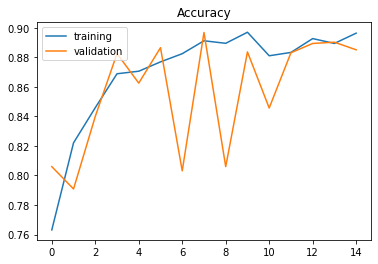

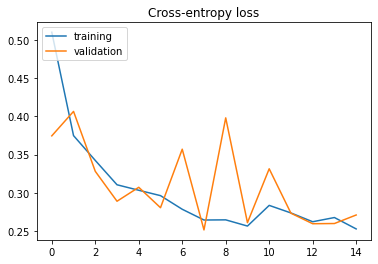

In [ ]:
def plot_accuracies_and_losses(history):
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()
    
    plt.title('Cross-entropy loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()

plot_accuracies_and_losses(history)

In [ ]:
test_dir = 'dataFromKaggle/aerial-cactus-identification/test/'
test_imgs = listdir(test_dir)
print(len(test_imgs))
test_imgs[:5]

4000


['000940378805c44108d287872b2f04ce.jpg',
 '0017242f54ececa4512b4d7937d1e21e.jpg',
 '001ee6d8564003107853118ab87df407.jpg',
 '002e175c3c1e060769475f52182583d0.jpg',
 '0036e44a7e8f7218e9bc7bf8137e4943.jpg']

In [ ]:
def path_to_numpy_array(path):
    tensor = img_to_tensor(path)
    array = tensor.numpy()
    return array

test_image_paths = [test_dir + ti for ti in test_imgs]
test_instances = np.asarray([path_to_numpy_array(tip) for tip in test_image_paths])

test_instances[:2]

array([[[[0.22352941, 0.23137255, 0.21176471],
         [0.20784314, 0.21568628, 0.19607843],
         [0.10588235, 0.11372549, 0.09411765],
         ...,
         [0.21960784, 0.17254902, 0.21176471],
         [0.2       , 0.15294118, 0.19215687],
         [0.23529412, 0.1882353 , 0.22745098]],

        [[0.20392157, 0.21176471, 0.19215687],
         [0.2       , 0.20784314, 0.1882353 ],
         [0.11764706, 0.1254902 , 0.10588235],
         ...,
         [0.23137255, 0.18431373, 0.22352941],
         [0.20392157, 0.15686275, 0.19607843],
         [0.2627451 , 0.21568628, 0.25490198]],

        [[0.38039216, 0.3882353 , 0.36862746],
         [0.34509805, 0.3529412 , 0.33333334],
         [0.23137255, 0.23921569, 0.21960784],
         ...,
         [0.24705882, 0.2       , 0.23921569],
         [0.22352941, 0.1764706 , 0.21568628],
         [0.25882354, 0.21176471, 0.2509804 ]],

        ...,

        [[0.32156864, 0.29411766, 0.3254902 ],
         [0.3137255 , 0.28627452, 0.31764707]

In [ ]:
predictions = model.predict(test_instances)
print(type(predictions))
print(type(test_imgs))
print(len(predictions))
print(len(test_imgs))
for i in range(10):
    print(test_imgs[i])
for i in range(10):
    print(predictions[i])

<class 'numpy.ndarray'>
<class 'list'>
4000
4000
000940378805c44108d287872b2f04ce.jpg
0017242f54ececa4512b4d7937d1e21e.jpg
001ee6d8564003107853118ab87df407.jpg
002e175c3c1e060769475f52182583d0.jpg
0036e44a7e8f7218e9bc7bf8137e4943.jpg
0038ed6f7417b8275b393307f66cb1e3.jpg
0059dfa41de4441fc23b9a4b98ba99cb.jpg
0061bd302d735db829418cb90b4e6040.jpg
00754573d8c7223e73da553dd43780bd.jpg
008d9fce71c8e03a4c9cdd15ea908573.jpg
[0.00667286 0.99332714]
[0.00906924 0.99093074]
[0.9583354  0.04166457]
[0.4576697 0.5423303]
[0.01286176 0.9871383 ]
[0.0012212  0.99877876]
[0.00929768 0.9907023 ]
[0.05308602 0.946914  ]
[0.00239801 0.99760205]
[0.88328683 0.1167131 ]


In [ ]:
#submission_data = pd.DataFrame({'id': test_imgs, 'has_cactus': predictions.flatten()})
predictions_first_elm = []
predictions_second_elm = []

for lstObj in predictions:
    predictions_first_elm.append(lstObj[0])
    predictions_second_elm.append(lstObj[1])
    

submission_data = pd.DataFrame({'id': test_imgs, 
                                'not_a_cactus' : predictions_first_elm, \
                                'has_cactus': predictions_second_elm})

submission_data.head(20)

,id,not_a_cactus,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.006673,0.993327
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.009069,0.990931
2,001ee6d8564003107853118ab87df407.jpg,0.958335,0.041665
3,002e175c3c1e060769475f52182583d0.jpg,0.457670,0.542330
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.012862,0.987138
5,0038ed6f7417b8275b393307f66cb1e3.jpg,0.001221,0.998779
6,0059dfa41de4441fc23b9a4b98ba99cb.jpg,0.009298,0.990702
7,0061bd302d735db829418cb90b4e6040.jpg,0.053086,0.946914
8,00754573d8c7223e73da553dd43780bd.jpg,0.002398,0.997602
9,008d9fce71c8e03a4c9cdd15ea908573.jpg,0.883287,0.116713


In [ ]:
submission_data.to_csv('submission_seq.csv', index=False)

In [ ]:
# Replaced the !head in the reference code with the following
submission_df = pd.read_csv('submission_seq.csv',
                              index_col='id')
print('Total entries: ' + str(submission_df.size))
print(submission_df.head(10))

Total entries: 8000
                                      not_a_cactus  has_cactus
id                                                            
000940378805c44108d287872b2f04ce.jpg      0.006673    0.993327
0017242f54ececa4512b4d7937d1e21e.jpg      0.009069    0.990931
001ee6d8564003107853118ab87df407.jpg      0.958335    0.041665
002e175c3c1e060769475f52182583d0.jpg      0.457670    0.542330
0036e44a7e8f7218e9bc7bf8137e4943.jpg      0.012862    0.987138
0038ed6f7417b8275b393307f66cb1e3.jpg      0.001221    0.998779
0059dfa41de4441fc23b9a4b98ba99cb.jpg      0.009298    0.990702
0061bd302d735db829418cb90b4e6040.jpg      0.053086    0.946914
00754573d8c7223e73da553dd43780bd.jpg      0.002398    0.997602
008d9fce71c8e03a4c9cdd15ea908573.jpg      0.883287    0.116713


In [ ]:
X_test = test_instances
print(X_test.shape)
predictions = model.predict(X_test)
#for i in range(len(predictions)):
#    print(predictions[i])

(4000, 32, 32, 3)


In [ ]:
# It save text file with Hex numbers in HDF5 format in the current dir
model.save('CactusClassifySeqModel.h5')

In [ ]:
predictions = model.predict(X_test)
print(predictions)
print(predictions[0])
print(predictions[2])

[[0.00667286 0.99332714]
 [0.00906924 0.99093074]
 [0.9583354  0.04166457]
 ...
 [0.00123443 0.9987656 ]
 [0.01582965 0.9841703 ]
 [0.14016184 0.85983807]]
[0.00667286 0.99332714]
[0.9583354  0.04166457]


In [ ]:
def representative_dataset():
    for _ in range(100):
      data =  X_test
      yield [data.astype(np.float32)]
        
print(representative_dataset())

<generator object representative_dataset at 0x000001305F4617C8>


In [ ]:
tf.saved_model.save(model, "saved_cactus_seq_model_keras_dir")
converter = tf.lite.TFLiteConverter.from_saved_model("saved_cactus_seq_model_keras_dir")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: saved_cactus_seq_model_keras_dir\assets


In [ ]:
with open('CactusClassifySeqModel.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
interpreter = tf.lite.Interpreter(model_path="CactusClassifySeqModel.tflite")
interpreter.allocate_tensors()

In [ ]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('input_details:\n', input_details)
print('output_details:\n', output_details)

input_details:
 [{'name': 'serving_default_flatten_input:0', 'index': 13, 'shape': array([ 1, 32, 32,  3]), 'shape_signature': array([-1, 32, 32,  3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output_details:
 [{'name': 'StatefulPartitionedCall:0', 'index': 14, 'shape': array([1, 2]), 'shape_signature': array([-1,  2]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
# Test the model on random input data.
input_shape = input_details[0]['shape']
print(input_shape)
input_data = [X_test[0]]
print(input_data)
input_data = np.array(input_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[ 1 32 32  3]
[array([[[0.22352941, 0.23137255, 0.21176471],
        [0.20784314, 0.21568628, 0.19607843],
        [0.10588235, 0.11372549, 0.09411765],
        ...,
        [0.21960784, 0.17254902, 0.21176471],
        [0.2       , 0.15294118, 0.19215687],
        [0.23529412, 0.1882353 , 0.22745098]],

       [[0.20392157, 0.21176471, 0.19215687],
        [0.2       , 0.20784314, 0.1882353 ],
        [0.11764706, 0.1254902 , 0.10588235],
        ...,
        [0.23137255, 0.18431373, 0.22352941],
        [0.20392157, 0.15686275, 0.19607843],
        [0.2627451 , 0.21568628, 0.25490198]],

       [[0.38039216, 0.3882353 , 0.36862746],
        [0.34509805, 0.3529412 , 0.33333334],
        [0.23137255, 0.23921569, 0.21960784],
        ...,
        [0.24705882, 0.2       , 0.23921569],
        [0.22352941, 0.1764706 , 0.21568628],
        [0.25882354, 0.21176471, 0.2509804 ]],

       ...,

       [[0.32156864, 0.29411766, 0.3254902 ],
        [0.3137255 , 0.28627452, 0.31764707],
       

In [ ]:
# Function to convert some hex values into an array for C programming
def hex_to_c_array(hex_data, var_name):
    c_str = ""

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += "#define " + var_name.upper() + '_H\n\n'

    # Add array length at the top of the file
    c_str += '\nconst unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    # Declare C variable
    c_str += 'alignas(8) const unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data):
        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add formating so each line stays within 80 characters
        if (i + 1) < len(hex_data):
          hex_str += ','
        if (i + 1) % 12 == 0:
          hex_str += '\n'
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n' + format(''.join(hex_array)) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str

In [ ]:
# Write TFLite model to a C source (or header) file
with open("cactus_seq_model_esp32" + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, "cactus_seq_model_esp32"))

In [ ]:
print(X_test[0][0][0][0])
print(X_test[0][0][0][1])
print(X_test[0][0][0][2])

print(X_test[0][31][31][0])
print(X_test[0][31][31][1])
print(X_test[0][31][31][2])

print('The last element')
print(X_test[0][31][31][2])
print('The last but one')
print(X_test[0][31][31][1])
print(len(X_test[0]))
print(len(X_test[0][0]))
print(len(X_test[0][0][0]))

0.22352941
0.23137255
0.21176471
0.41960785
0.3764706
0.40784314
The last element
0.40784314
The last but one
0.3764706
32
32
3


In [ ]:
# The same indices will be valid for the first element of X_test[0] 
# The length values initialized here are the same for any element of X_test[]
lenK = len(X_test[2][0][0])
lenJ = len(X_test[2][0])
lenI = len(X_test[2][0])
print(lenK, lenJ, lenI)

3 32 32


In [ ]:
def gen_X_test_hex(X_tst, num):
    print('\n X_test' + str(num) + '[]:\n {')
    c_str = 'const float x_test' + str(num) + '[32*32*3] = { '
    for i in range(lenI):
        for j in range(lenJ):
            for k in range(lenK):
                print(' ', X_tst[i][j][k], 'f,', sep='', end='')
                c_str += "%s%f%s" % (' ', X_tst[i][j][k], 'f,')

    c_str += '\n};\n'
    print('\n};\n')
    return c_str

# Write X_test[0] input to a  header file
index = 0
file_name = "cactus_X_test" + str(index) + "_data" + '.h'
print(file_name)
with open(file_name, 'w') as file:
    file.write(gen_X_test_hex(X_test[index], index))

# Write X_test[2] input to a  header file
index = 2
file_name = "cactus_X_test" + str(index) + "_data" + '.h'
print(file_name)
with open(file_name, 'w') as file:
    file.write(gen_X_test_hex(X_test[index], index))

cactus_X_test0_data.h

 X_test0[]:
 {
 0.22352941f, 0.23137255f, 0.21176471f, 0.20784314f, 0.21568628f, 0.19607843f, 0.105882354f, 0.11372549f, 0.09411765f, 0.17254902f, 0.18039216f, 0.16078432f, 0.27058825f, 0.2901961f, 0.26666668f, 0.43529412f, 0.45490196f, 0.43137255f, 0.41960785f, 0.4392157f, 0.42352942f, 0.3647059f, 0.38431373f, 0.36862746f, 0.25490198f, 0.27450982f, 0.25882354f, 0.17254902f, 0.19215687f, 0.1764706f, 0.25882354f, 0.26666668f, 0.25490198f, 0.28627452f, 0.29411766f, 0.28235295f, 0.32941177f, 0.32941177f, 0.32941177f, 0.34509805f, 0.34509805f, 0.34509805f, 0.32156864f, 0.32156864f, 0.32156864f, 0.1764706f, 0.1764706f, 0.1764706f, 0.18039216f, 0.16078432f, 0.1764706f, 0.16862746f, 0.14901961f, 0.16470589f, 0.3019608f, 0.28235295f, 0.29803923f, 0.30588236f, 0.28627452f, 0.3019608f, 0.23529412f, 0.21176471f, 0.22745098f, 0.26666668f, 0.24313726f, 0.25882354f, 0.21568628f, 0.1882353f, 0.21568628f, 0.29803923f, 0.27058825f, 0.29803923f, 0.20784314f, 0.16862746f, 0.2f, 0.2